# Springboard Data Analytics Assignment

**Author:** Marcella Morgan
**Image Credit:** Images generated with the help of ChatGPT (OpenAI).
![Lady tasting tea + normal curve](images/lady_drinking_tea.png)


## Introduction  

In this assignment I’m working through four problems that all use simulation to explore different ideas in statistics.  

1. **Lady Tasting Tea (Extended):**  
   I’ll extend the classic experiment to 12 cups instead of 8, simulate the chance of guessing correctly, and compare the results to the original setup.  

2. **Normal Distribution:**  
   I’ll generate lots of small samples from a normal distribution and compare the sample standard deviation (ddof=1) with the population version (ddof=0). The goal is to see the difference on histograms and think about what happens with bigger samples.  

3. **t-Tests and Type II Errors:**  
   Here I’ll run simulations of t-tests while changing the difference in means. I’ll measure how often the test fails to reject the null when it should (type II errors) and see how that changes as the effect gets stronger.  

4. **ANOVA vs t-Tests:**  
   I’ll generate three groups with different means and compare running one ANOVA versus doing three separate t-tests. The point is to see why ANOVA is better when looking at more than two groups.  

Overall, the assignment is about practicing simulation, interpreting results, and understanding why we choose one statistical test over another.  


## Problem 1: Lady Testing Tea

[Fisher’s](https://en.wikipedia.org/wiki/Ronald_Fisher) Lady Tasting Tea experiment illustrates the logic of hypothesis testing as a method for distinguishing random variation from meaningful patterns in data. 

The [null hypothesis](https://www.investopedia.com/terms/n/null_hypothesis.asp) assumes that the participant has no ability to distinguish the order of pouring and that when the correct cup is chosen it is becasue of random chance. So rather than testing the claim of superior tea-tasting ability directly, the experiment evaluates whether the observed pattern of results is plausibly explained by guessing, i.e. random chance. 
 "A null Hypothesis (H0) is the statement that the findings of an experiment will show no statistical difference between the current condition (control condition) and the experimental condition."


Using [math.comb](https://docs.python.org/3/library/math.html#math.comb) the number of possible ways to choose 4 cups out of 8 is calculated.

In [ ]:
import numpy as np
import math

n_total = 8    # total number of cups
n_tea = 4      # number of tea-first cups 

total_guesses = math.comb(n_total, n_tea)
total_guesses

70

The [p-value](https://www.dummies.com/article/academics-the-arts/math/statistics/what-a-p-value-tells-you-about-statistical-data-169734/) represents the probability of obtaining the results observed if the null hypothesis were true. A small p-value indicates that the observed pattern would be unlikely to occur under random variation alone, providing evidence that something other than chance may be influencing the outcome.

In [16]:
p_value_8_cups = 1 / total_guesses
p_value_8_cups

0.014285714285714285

So the p-value is lower than 0.05 which means that we can reject the null hypothesis. Choosing the 4 tea-first cups by chance is very unlikely, which means that something else must be going on, that the lady can tell the difference.

Although the probability of choosing all the tea-first cups can be computed exactly using combinations, the same result can be estimated by simulation by repeatedly sampling from the set of all 8 cups assuming the null hypothesis that cups are being chosen by chance.

This can be done using [np.random.choice](https://numpy.org/devdocs/reference/random/generated/numpy.random.choice.html)

In [ ]:

def ltt_simulation(total, size, n_simulations):

    successes = 0 # Starting success counter at 0

    for _ in range(n_simulations):
        # np.random simulates choosing 4 cups by guessing
        guess = np.random.choice(total, size, replace=False) #replace means only unique values chosen
        
        # check success and adding successful guesses to the success counter
        if set(guess) == {0, 1, 2, 3}: # arbitarily setting these cups as the correct guesses
            successes += 1

    # Estimate probability
    estimated_probability = successes / n_simulations
    
    return estimated_probability

ltt_simulation(8,4,100000)

0.01391

Here, we increase the challenge by preparing 12 cups (8 tea-first and 4 milk-first). We simulate this setup repeatedly by shuffling the cups, recording how often the participant could identify all cups correctly purely by guessing. 

In [26]:
ltt_simulation(12,4,100000)

0.00221

Incidentally it is absolutley possible to tell if milk has been added before or after tea. [This reddit post](https://www.reddit.com/r/askscience/comments/1bqu33/why_does_tea_taste_different_when_adding_the_milk) explains why tea-first results in more denaturing of milk proteins which can change the taste of the milk. And also if the tea is made with a tea bag, the flavour components are more drawn out by the surfactancy of the milk when it comes into contact with the leaves. The only way anyone should be making tea is to add the tea bag to the milk letting it infuse as the kettle boils. Then pour in boiling water on top of milk infusion. The tea bag should be left in the cup while drinking the tea.

Fisher’s approach reverses everyday intuition. Rather than treating human action as predictable and chance as chaotic, it treats randomness as the stable, predictable reference point. Human action is messy and variable. Randomness, paradoxically, is what we can model reliably. When a result doesn't fit into the pattern of chance, it suggests that something other than chance may be causing the abberation. 

Causation is the thing that is out of the ordinary. This is an important re-framing for any kind of scientific analysis. It is always safer to assume that finding causation is the unexpected outcome.

## Problem 2: Normal Distribution

Another example of chance creating predictable patterns is the bimonial distribution of the number of cups guessed correctly in the above simulation. A binomial distribution describes the outcomes of a process where a fixed number of trials are performed and each trial has only two possible outcomes, such as success or failure. In the Lady Tasting Tea experiment, each cup can be classified correctly or incorrectly, and the total number of correct classifications varies from one trial of the experiment to another. 

We can plot this binomial distribution.

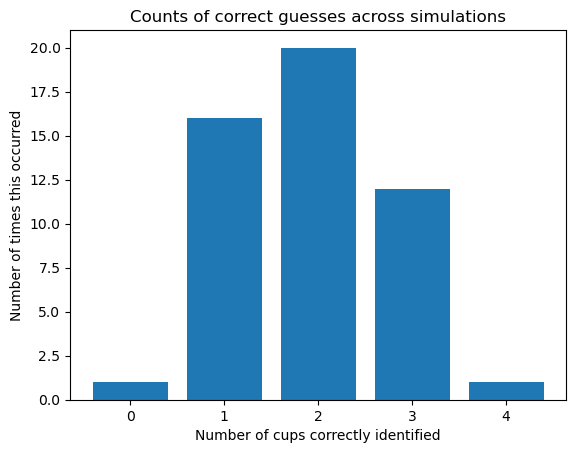

In [41]:
true_set = {0, 1, 2, 3}
correct_counts = []

for _ in range(50):
    guess = np.random.choice(8, 4, replace=False)
    
    # count how many cups are correct
    correct = len(set(guess).intersection(true_set))
    correct_counts.append(correct)

values, counts = np.unique(correct_counts, return_counts=True)


plt.bar(values, counts)
plt.xticks(values)
plt.xlabel("Number of cups correctly identified")
plt.ylabel("Number of times this occurred")
plt.title("Counts of correct guesses across simulations")
plt.show()


When we increase the number of shuffles the plot starts to look more symmetrical and you see less variation across shuffles. The bar plot starts to look more like a normal distribution.

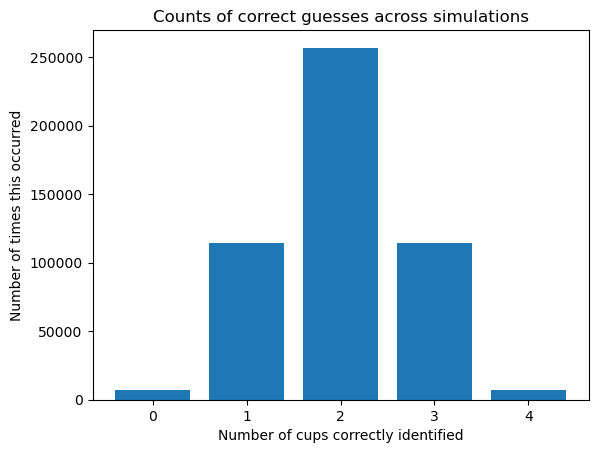

In [42]:
true_set = {0, 1, 2, 3}
correct_counts = []

for _ in range(500000):
    guess = np.random.choice(8, 4, replace=False)
    
    # count how many cups are correct
    correct = len(set(guess).intersection(true_set))
    correct_counts.append(correct)

values, counts = np.unique(correct_counts, return_counts=True)


plt.bar(values, counts)
plt.xticks(values)
plt.xlabel("Number of cups correctly identified")
plt.ylabel("Number of times this occurred")
plt.title("Counts of correct guesses across simulations")
plt.show()

This task demonstrates the distinction between sample standard deviation (unbiased estimator) and population standard deviation (biased but lower variance). We generate a very large number of small samples (100,000 samples of size 10) from a standard normal distribution. For each, we calculate the standard deviation using two different definitions:

ddof=0: divides by n, appropriate for a full population.

ddof=1: divides by n-1, correcting bias when estimating from a sample.

We then plot histograms of these results on the same axes, using transparency to highlight differences. The visualization should reveal a small but systematic shift between the two. We conclude by discussing how increasing the sample size would shrink this difference, illustrating the consistency of estimators.

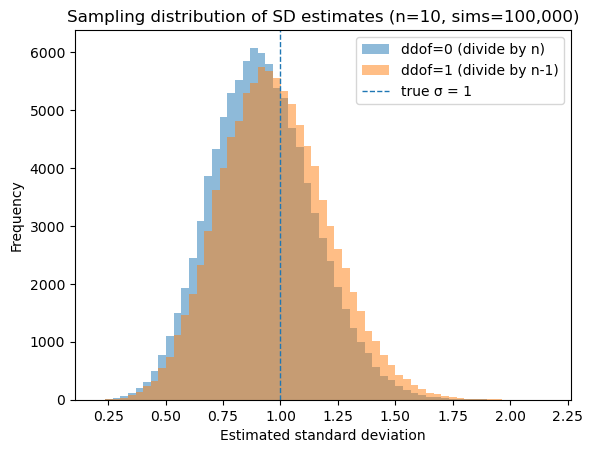

Mean(sd, ddof=0): 0.9234252633979069
Mean(sd, ddof=1): 0.9733756937594341
Mean difference: 0.04995043036152724


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1–2) params
rng = np.random.default_rng(42)
n_sims = 100_000
n = 10

# 3) generate samples
X = rng.standard_normal(size=(n_sims, n))

# 4) compute sd with ddof=0 and ddof=1
sd0 = np.std(X, axis=1, ddof=0)
sd1 = np.std(X, axis=1, ddof=1)

# 5) common bins
bins = np.linspace(min(sd0.min(), sd1.min()), max(sd0.max(), sd1.max()), 60)

plt.hist(sd0, bins=bins, alpha=0.5, label="ddof=0 (divide by n)")
plt.hist(sd1, bins=bins, alpha=0.5, label="ddof=1 (divide by n-1)")

# 6) reference + labels
plt.axvline(1.0, linestyle="--", linewidth=1, label="true σ = 1")
plt.title(f"Sampling distribution of SD estimates (n={n}, sims={n_sims:,})")
plt.xlabel("Estimated standard deviation")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Mean(sd, ddof=0):", sd0.mean())
print("Mean(sd, ddof=1):", sd1.mean())
print("Mean difference:", (sd1 - sd0).mean())


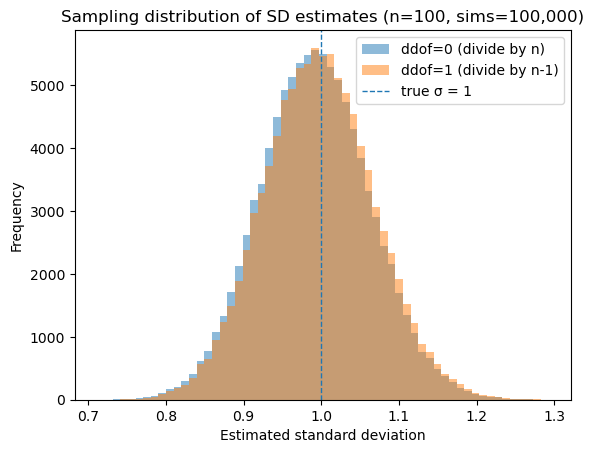

Mean(sd, ddof=0): 0.9921978429151027
Mean(sd, ddof=1): 0.9971963523482975
Mean difference: 0.004998509433195009


In [ ]:
# 1–2) params
rng = np.random.default_rng(42)
n_sims = 100000
n = 100

# 3) generate samples
X = rng.standard_normal(size=(n_sims, n))

# 4) compute sd with ddof=0 and ddof=1
sd0 = np.std(X, axis=1, ddof=0)
sd1 = np.std(X, axis=1, ddof=1)

# 5) common bins
bins = np.linspace(min(sd0.min(), sd1.min()), max(sd0.max(), sd1.max()), 60)

plt.hist(sd0, bins=bins, alpha=0.5, label="ddof=0 (divide by n)")
plt.hist(sd1, bins=bins, alpha=0.5, label="ddof=1 (divide by n-1)")

# 6) reference + labels
plt.axvline(1.0, linestyle="--", linewidth=1, label="true σ = 1")
plt.title(f"Sampling distribution of SD estimates (n={n}, sims={n_sims:,})")
plt.xlabel("Estimated standard deviation")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Mean(sd, ddof=0):", sd0.mean())
print("Mean(sd, ddof=1):", sd1.mean())
print("Mean difference:", (sd1 - sd0).mean())

## Problem 3: t-Tests and Type II Errors

In this section, we investigate type II errors, which occur when a test fails to reject the null hypothesis despite there being a true difference. We systematically vary the mean difference (d) between two normal distributions, from 0 to 1.0 in steps of 0.1. For each value of d:

Draw two samples of size 100 (one from N(0,1), the other from N(d,1)).

Perform an independent two-sample t-test, using a 5% significance level.

Repeat the process 1,000 times and record the proportion of times the null hypothesis was not rejected.

We then plot type II error rates against effect size, showing the classic trade-off: small differences are harder to detect, while large differences result in low type II error. This simulation reinforces the importance of effect size and sample size in determining test power.

We pretend we have two populations that are normally distributed.

One has a mean of 0, and the other has a mean of d, where d is an effect size that we increase from 0 to 1.0 in steps of 0.1.

For each value of d, we:

Take two samples of size 100 (one from each population).

Run a two-sample t-test at the usual 5% significance level.

Repeat this 1,000 times and record how often the test fails to reject the null hypothesis.

d = 0.0, Type II Error Rate = 0.948
d = 0.1, Type II Error Rate = 0.890
d = 0.2, Type II Error Rate = 0.715
d = 0.3, Type II Error Rate = 0.444
d = 0.4, Type II Error Rate = 0.223
d = 0.5, Type II Error Rate = 0.067
d = 0.6, Type II Error Rate = 0.015
d = 0.7, Type II Error Rate = 0.002
d = 0.8, Type II Error Rate = 0.000
d = 0.9, Type II Error Rate = 0.000
d = 1.0, Type II Error Rate = 0.000


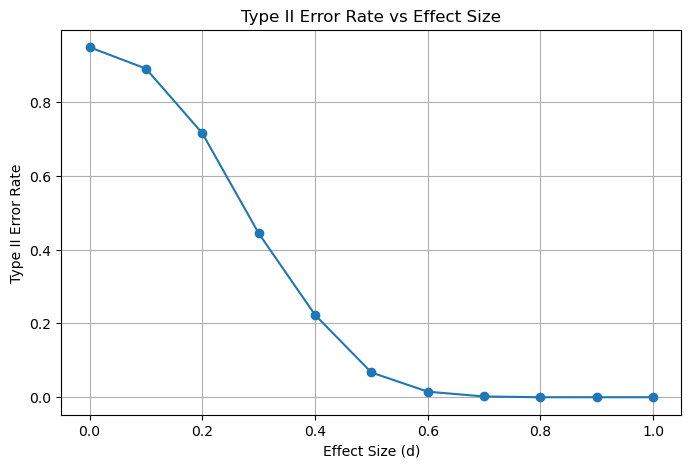

In [20]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Parameters
sample_size = 100
num_simulations = 1000
alpha = 0.05  # significance level

effect_sizes = np.arange(0, 1.1, 0.1)  # d = 0.0, 0.1, ..., 1.0
type2_errors = []  # store error rates

for d in effect_sizes:
    errors = 0

    for _ in range(num_simulations):
        # Sample from N(0,1)
        group1 = np.random.normal(loc=0, scale=1, size=sample_size)
        # Sample from N(d,1)
        group2 = np.random.normal(loc=d, scale=1, size=sample_size)

        # Two-sample independent t-test
        t_stat, p_value = ttest_ind(group1, group2)

        # Type II error: fail to reject H0 when H0 is false
        # (i.e., p > alpha even though the true means differ when d > 0)
        if p_value > alpha:
            errors += 1

    # Proportion of Type II errors
    type2_rate = errors / num_simulations
    type2_errors.append(type2_rate)
    print(f"d = {d:.1f}, Type II Error Rate = {type2_rate:.3f}")

# ---- Plotting ---- #
plt.figure(figsize=(8, 5))
plt.plot(effect_sizes, type2_errors, marker='o')
plt.xlabel("Effect Size (d)")
plt.ylabel("Type II Error Rate")
plt.title("Type II Error Rate vs Effect Size")
plt.grid(True)
plt.show()


## Problem 4: ANOVA vs t-Tests

In this task, we simulate a classic comparison of statistical approaches for multiple group testing. We generate three independent samples (each size 30) from normal distributions with means 0, 0.5, and 1 (standard deviation fixed at 1). Two approaches are then applied:

One-way ANOVA: tests the null hypothesis that all three group means are equal in a single, global test.

Multiple independent t-tests: three pairwise comparisons (1 vs 2, 1 vs 3, 2 vs 3).

We compare the results and discuss why ANOVA is typically preferred: it provides a unified test that controls type I error across multiple comparisons. Running several t-tests increases the risk of false positives (familywise error rate), making ANOVA more robust and interpretable for multi-group scenarios.

In [ ]:
import numpy as np


n = 30          # sample size
sd = 1          # standard deviation

group1 = np.random.normal(loc=0.0, scale=sd, size=n)
group2 = np.random.normal(loc=0.5, scale=sd, size=n)
group3 = np.random.normal(loc=1.0, scale=sd, size=n)

groups = [group1, group2, group3]

print(np.mean(group1), np.mean(group2), np.mean(group3))
print(np.std(group1), np.std(group2), np.std(group3))



-0.20476844089572657 0.6919047537605315 1.0252296576318913
0.9048094506177626 1.072512988637117 0.7405238709472072


In [19]:
from scipy import stats

F_stat, p_value = stats.f_oneway(group1, group2, group3)

print("F statistic:", F_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject H0: at least one group mean is different")
else:
    print("Fail to reject H0: no evidence of a difference in means")


F statistic: 13.985534204636698
p-value: 5.413583191880173e-06
Reject H0: at least one group mean is different


References

montecarlo simulation: https://www.investopedia.com/terms/m/montecarlosimulation.asp
normal vs binomial distributions: https://www.ebsco.com/research-starters/business-and-management/normal-and-binomial-distributions
p-value https://www.dummies.com/article/academics-the-arts/math/statistics/what-a-p-value-tells-you-about-statistical-data-169734/
null hypothesis https://www.investopedia.com/terms/n/null_hypothesis.asp
lady testing tea https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

# END